In this notebook I'll try to explain the models. I'll first try directly look into the model and then use global surrogate method to train a decision tree regressor to achieve as much similarity as the model.

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import joblib
import itertools
import compose
import json
%matplotlib inline

import sys
import os
import warnings
sys.path.append(os.path.join(
    os.path.abspath(os.path.pardir), 'src'
))

import nzcompetition
from nzcompetition.preparation import make_prep_pipeline

from libdl.dl import dl

# Performance

In [5]:
y_col = 'performance'
y_col_raw = 'TOM Wash PT Model X'
seqmut, seqprot = False, True
model_fname = '../models/submission/perf_FTF10N_xgboost.pkl'

X_train, y, X_val = nzcompetition.get_raw_data(target=y_col)
X_train, y = nzcompetition.drop_dup(X_train, y)
X_train, X_val = nzcompetition.drop_tom(X_train), nzcompetition.drop_tom(X_val)
X_test = nzcompetition.get_test_data()
y_val = (
    dl.datasets.get(id='nz_kaggle').files.get(id='validation').as_df()
    .set_index(["Organism Code", "purifiedsample_sequoia_identifier"])
    [y_col_raw]
)
X = pd.concat([X_train, X_val])
y = pd.concat([y, y_val])

with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=RuntimeWarning)
    prep_pipe = make_prep_pipeline(seqmut, seqprot, False)
    X_train = prep_pipe.fit_transform(X)
    X_test = prep_pipe.transform(X_test)

In [11]:
cols = prep_pipe.named_steps['transformer'].df_columns_

In [13]:
model = joblib.load(model_fname)
model

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  rando

In [17]:
order = model.feature_importances_.argsort()

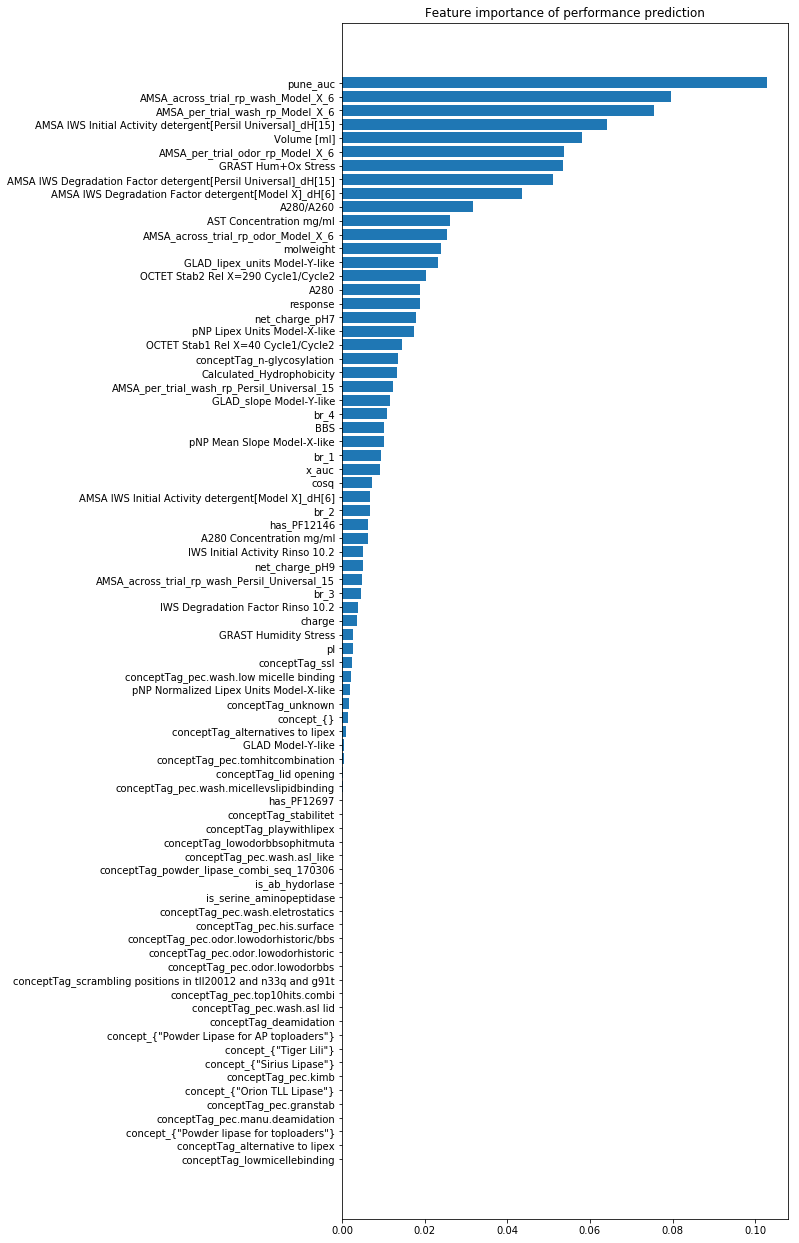

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8, 22))

ax.barh(np.arange(len(cols)), model.feature_importances_[order])
ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(cols[order])
ax.set_title('Feature importance of {} prediction'.format(y_col))

fig.show()

# Odor

In [30]:
y_col = 'odor'
y_col_raw = 'TOM Odor PT Model X'
seqmut, seqprot = True, False
model_fname = '../models/submission/odor_TFF10N_adaboost.pkl'

X_train, y, X_val = nzcompetition.get_raw_data(target=y_col)
X_train, y = nzcompetition.drop_dup(X_train, y)
X_train, X_val = nzcompetition.drop_tom(X_train), nzcompetition.drop_tom(X_val)
X_test = nzcompetition.get_test_data()
y_val = (
    dl.datasets.get(id='nz_kaggle').files.get(id='validation').as_df()
    .set_index(["Organism Code", "purifiedsample_sequoia_identifier"])
    [y_col_raw]
)
X = pd.concat([X_train, X_val])
y = pd.concat([y, y_val])

with warnings.catch_warnings():
    warnings.simplefilter('ignore', category=RuntimeWarning)
    prep_pipe = make_prep_pipeline(seqmut, seqprot, False)
    X_train = prep_pipe.fit_transform(X)
    X_test = prep_pipe.transform(X_test)

In [31]:
cols = prep_pipe.named_steps['transformer'].df_columns_

In [32]:
model = joblib.load(model_fname)
model

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=5,
                                                       max_features=0.6822762808570533,
                                                       max_leaf_nodes=28,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.6180026984836138, loss='linear',
                

In [33]:
order = model.feature_importances_.argsort()

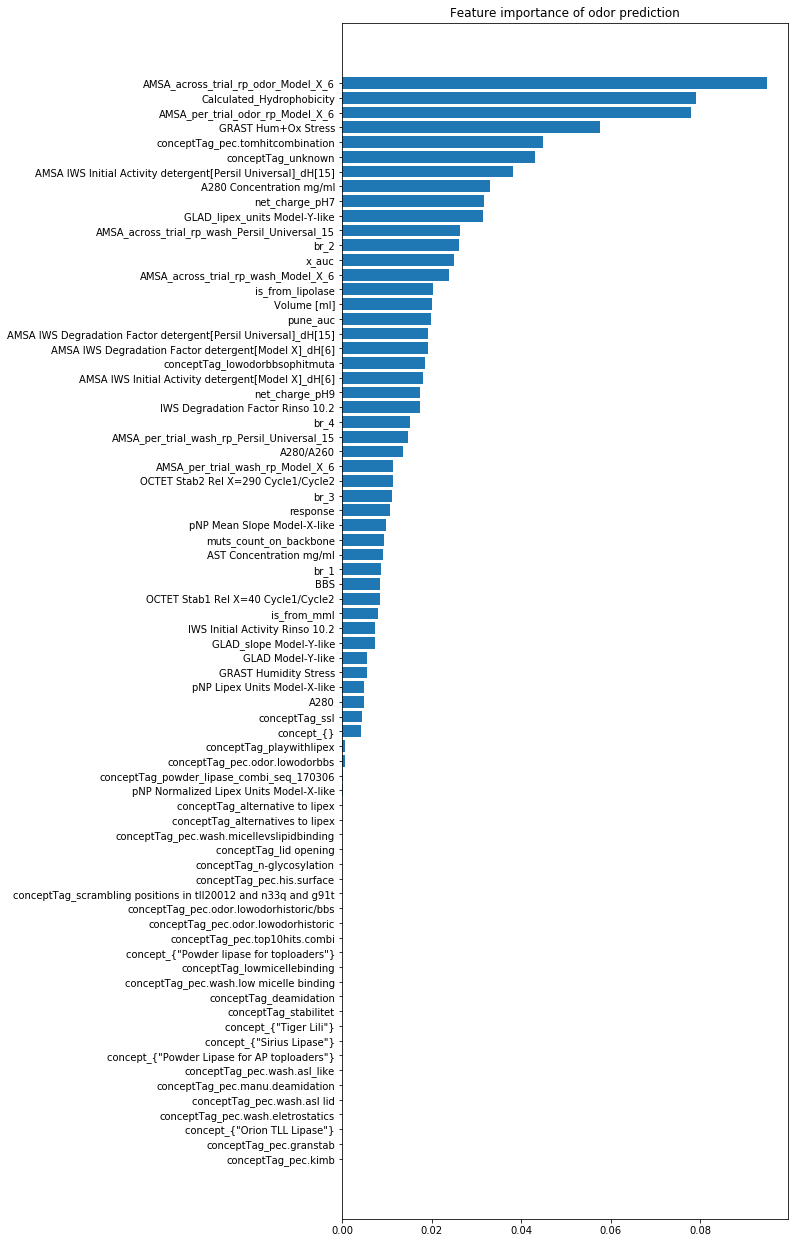

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(8, 22))

ax.barh(np.arange(len(cols)), model.feature_importances_[order])
ax.set_yticks(np.arange(len(cols)))
ax.set_yticklabels(cols[order])
ax.set_title('Feature importance of {} prediction'.format(y_col))

fig.show()